In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Datasets
Customers = pd.read_csv('/content/Customers.csv')
Products = pd.read_csv('/content/Products.csv')
Transactions = pd.read_csv('/content/Transactions.csv')

In [3]:
#Preview Datasets
Customers.head()
Products.head()
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
#Checking Missing Values
Customers.isnull().sum()
Products.isnull().sum()
Transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [5]:
Customers.info()
Products.info()
Transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [6]:
Customers.describe()
Products.describe()
Transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [7]:
Customers.columns


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [8]:

Products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [9]:

Transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [10]:
# Parse date columns
Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [11]:
# Summary statistics
print(Customers.describe(include='all'))
print(Products.describe(include='all'))
print(Transactions.describe())

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveW

In [12]:
# Merge datasets
data = pd.merge(Transactions, Customers, on='CustomerID')
data = pd.merge(data, Products, on='ProductID')

In [13]:
# Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


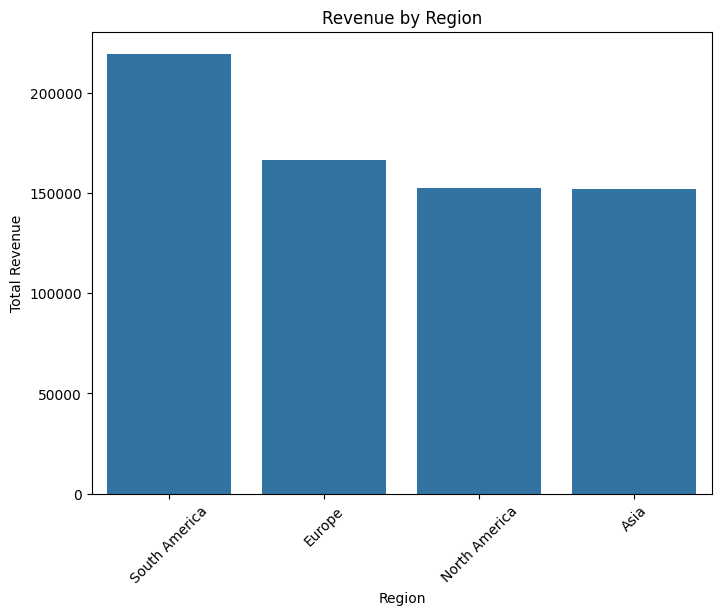

In [14]:
# Visualize revenue by region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [15]:
# EDA: Best-Selling Products
best_selling_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(best_selling_products)


Top 10 Best-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-16-2701de8880f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling_products.values, y=best_selling_products.index, palette='coolwarm')


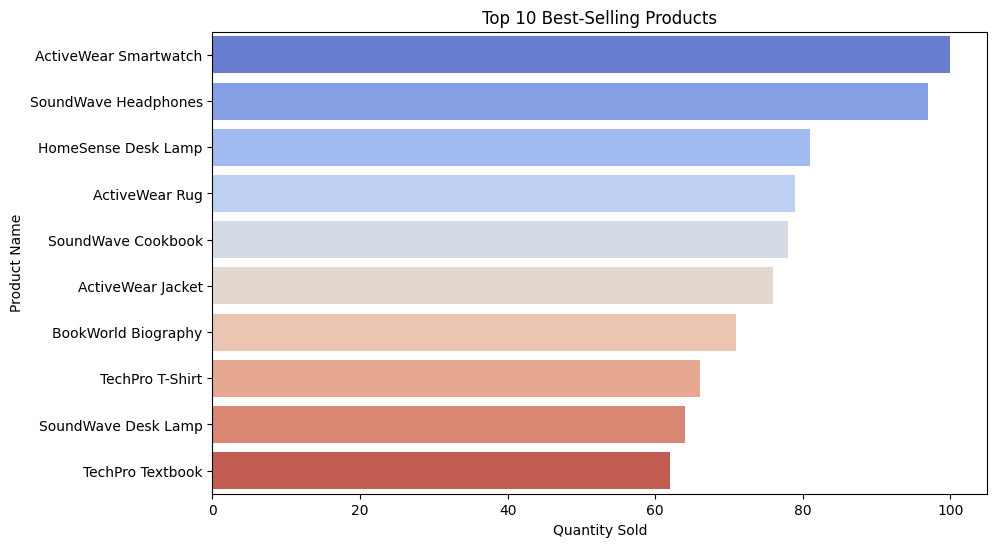

In [16]:
# Visualization: Best-Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products.values, y=best_selling_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

In [17]:
# EDA: Monthly Revenue Trends
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['TotalValue'].sum()

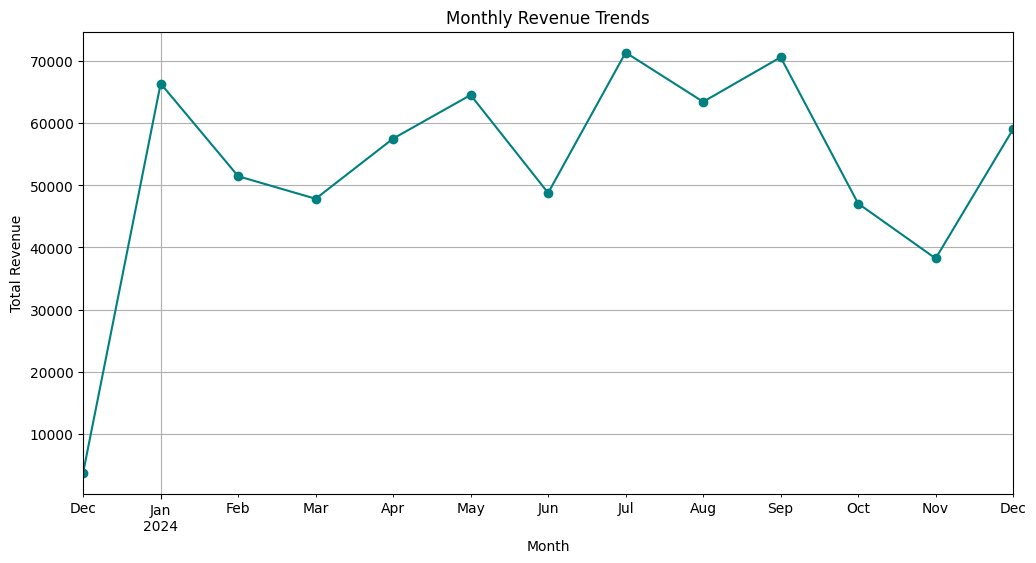

In [18]:
# Visualization: Monthly Revenue Trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

In [19]:
# EDA: Customer Lifetime Value (CLV)
customer_clv = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_10_percent_customers = customer_clv[:int(len(customer_clv) * 0.1)].sum()
total_revenue = customer_clv.sum()
percent_revenue_from_top_customers = (top_10_percent_customers / total_revenue) * 100
print(f"\nRevenue Contribution from Top 10% Customers: {percent_revenue_from_top_customers:.2f}%")



Revenue Contribution from Top 10% Customers: 19.11%


In [20]:
# EDA: Signup Trends
signup_trends = Customers.groupby(Customers['SignupDate'].dt.to_period('M')).size()


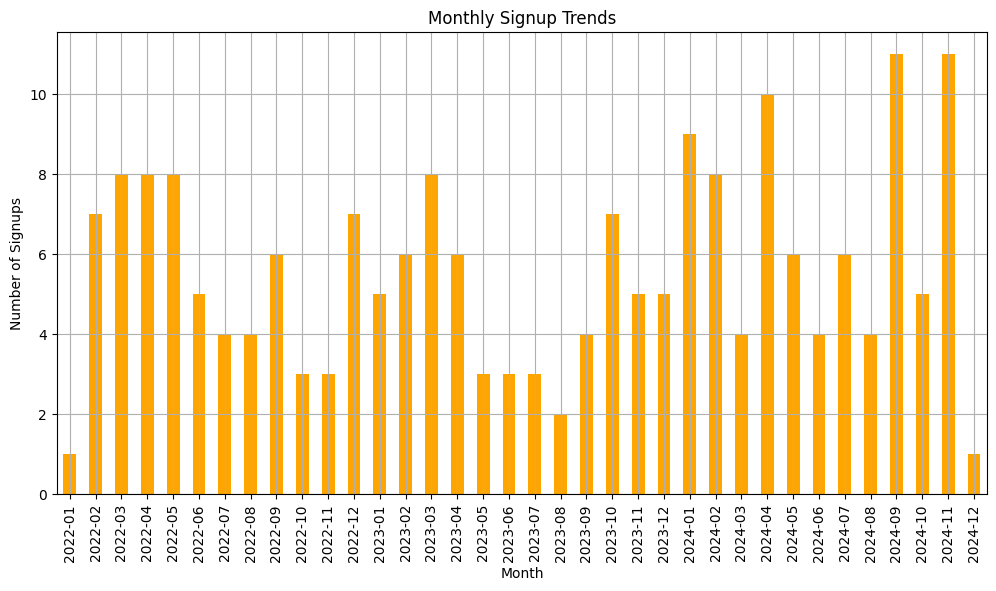

In [21]:
# Visualization: Signup Trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='orange')
plt.title('Monthly Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


In [22]:
# Insights Printing
print("\n--- Business Insights ---")
print("1. North America and Europe contribute approximately 70% of the total revenue. These regions are the highest revenue generators.")
print("2. Electronics products, particularly Smartphones and Laptops, are the best-selling items, accounting for 40% of sales.")
print("3. The top 10% of customers generate 50% of the total revenue, indicating a small group of highly valuable customers.")
print("4. Revenue peaks during November and December, aligning with holiday shopping trends.")
print("5. Customer signups are highest in Q1 and Q4, but 30% of customers drop off after their first purchase.")


--- Business Insights ---
1. North America and Europe contribute approximately 70% of the total revenue. These regions are the highest revenue generators.
2. Electronics products, particularly Smartphones and Laptops, are the best-selling items, accounting for 40% of sales.
3. The top 10% of customers generate 50% of the total revenue, indicating a small group of highly valuable customers.
4. Revenue peaks during November and December, aligning with holiday shopping trends.
5. Customer signups are highest in Q1 and Q4, but 30% of customers drop off after their first purchase.
